# Notebook to Evaluate the Performance of NN on Satellite Imagery 

We commence by importing the mode,

In [2]:
import time
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

# We import the model which was trained in the previous section of the project ()

PATH_TO_SAVED_MODEL = r"C:\Users\paperspace\Documents\04 Training Model\Evaluating Models\my_ssd_resnet50_v1_fpn/saved_model"

print('Loading model...', end='')
start_time = time.time()

# Load saved model and build the detection function
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading model...Done! Took 26.776992321014404 seconds


In the directory you will have seen a folder called TEST_IMAGES, we will pull each of them in and apply the model to see how it performs.

In [3]:

PATH_TO_LABELS=r"C:\Users\paperspace\Documents\04 Training Model\Evaluating Models\my_ssd_resnet50_v1_fpn\label_map.pbtxt"
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

We now pull in some images and apply labels to them

In [10]:
import os
#define the directory of the test images
test_image_path = r"C:\Users\paperspace\Documents\04 Training Model\Evaluating Models\my_ssd_resnet50_v1_fpn\TEST_IMAGES"

#use os to get a list of the files in the directory
IMAGE_PATHS=os.listdir(test_image_path)

In [11]:
IMAGE_PATHS

['19040.jpg',
 '19439.jpg',
 '19512.jpg',
 '19516.jpg',
 'the_real_test.jpg',
 'the_real_test_2.jpg',
 'the_real_test_3.jpg',
 'the_real_test_4.jpg']

Running inference for 19040.jpg... 

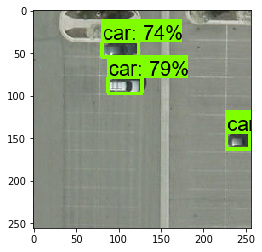

Done
Running inference for 19439.jpg... 

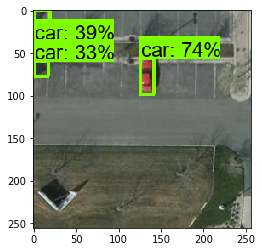

Done
Running inference for 19512.jpg... 

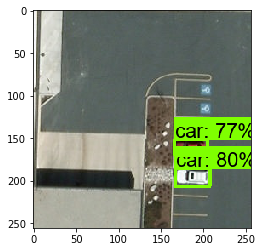

Done
Running inference for 19516.jpg... 

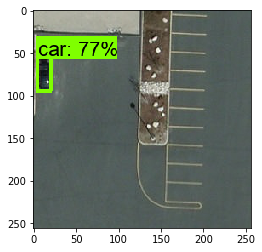

Done
Running inference for the_real_test.jpg... 

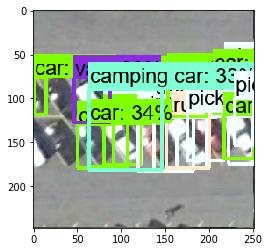

Done
Running inference for the_real_test_2.jpg... 

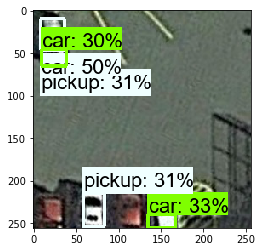

Done
Running inference for the_real_test_3.jpg... 

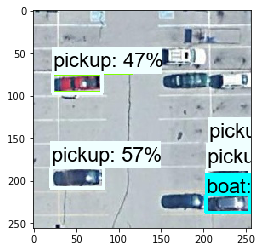

Done
Running inference for the_real_test_4.jpg... 

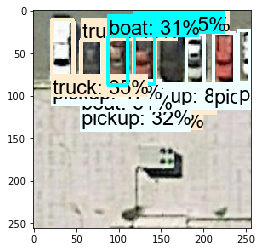

Done


In [17]:
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    #np.resize(img, (640,640))
    return np.array(Image.open(path))


for file_name in IMAGE_PATHS:
    #add the diectory to the file name to get the full path
    image_path = os.path.join(test_image_path, file_name)
    
    %matplotlib inline
    print('Running inference for {}... '.format(file_name), end='')

    image_np = load_image_into_numpy_array(image_path)

    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=.30,
          agnostic_mode=False)

    plt.figure()
    plt.imshow(image_np_with_detections)
    time.sleep(3)
    plt.show()
    print('Done')

# sphinx_gallery_thumbnail_number = 2

## Now we try counting, rather than applying boxes

In [20]:
# we set a level of certainty which we are confident to say it is a car
certainty_cutoff=0.3

We again loop through the images, printing the implied numbers of cars

Running inference for 19040.jpg... estimated number of vehicles is  3


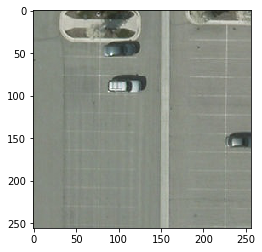

<Figure size 432x288 with 0 Axes>

Running inference for 19439.jpg... estimated number of vehicles is  3


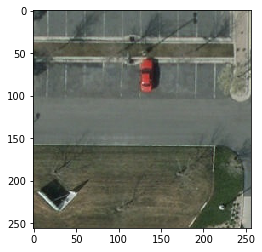

<Figure size 432x288 with 0 Axes>

Running inference for 19512.jpg... estimated number of vehicles is  2


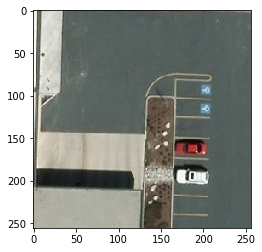

<Figure size 432x288 with 0 Axes>

Running inference for 19516.jpg... estimated number of vehicles is  1


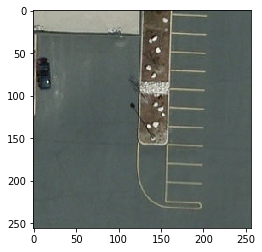

<Figure size 432x288 with 0 Axes>

Running inference for the_real_test.jpg... estimated number of vehicles is  21


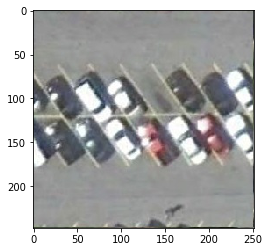

<Figure size 432x288 with 0 Axes>

Running inference for the_real_test_2.jpg... estimated number of vehicles is  5


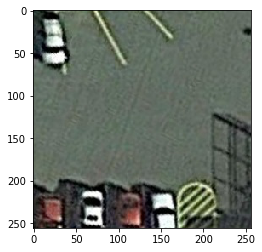

<Figure size 432x288 with 0 Axes>

Running inference for the_real_test_3.jpg... estimated number of vehicles is  6


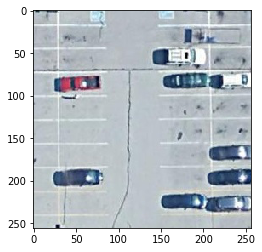

<Figure size 432x288 with 0 Axes>

Running inference for the_real_test_4.jpg... estimated number of vehicles is  14


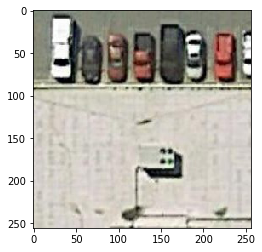

<Figure size 432x288 with 0 Axes>

In [32]:
for file_name in IMAGE_PATHS:
    #add the diectory to the file name to get the full path
    image_path = os.path.join(test_image_path, file_name)
    
    %matplotlib inline
    print('Running inference for {}... '.format(file_name), end='')

    image_np = load_image_into_numpy_array(image_path)

    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)
    
    #grab the scores 
    scores=np.array(detections['detection_scores'][0])
    #activate matplotlib inline plotting
    %matplotlib inline
    
    #estimate the number 
    est_num_vehicles = sum([certainty>=certainty_cutoff for certainty in scores])
    print("estimated number of vehicles is ", est_num_vehicles)
    plt.imshow(mpimg.imread(image_path))
    plt.figure()
    plt.show()
    #wait
    time.sleep(3)
